In [1]:
#all imports are listed are for the notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image
import seaborn as sns
import math
from statsmodels.stats import diagnostic
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import chain, combinations


import geopandas as gpd
import json
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import warnings
warnings.filterwarnings('ignore')

init_notebook_mode(connected=True)

In [2]:
#set this to True if you want to compute everything by yourself
#we didn't do it because plotly doesn't render well on Github Preview!
plotlyCompute = False

In [3]:
#importing data
data_folder = './data/'

Tesco_lsoa = pd.read_csv(data_folder + 'year_lsoa_grocery.csv')
lsoa_data_1 = pd.read_excel(data_folder + 'lsoa-data.xls','iadatasheet1',header=[0, 1, 2])
lsoa_data_2 = pd.read_excel(data_folder + 'lsoa-data.xls','iadatasheet2',header=[0, 1, 2])

#column's name
'''for col in lsoa_data_1.columns: 
    print(col) '''
    
#create a DataFrame with indicators
indicators=pd.DataFrame({
    'area_id':lsoa_data_2[('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Codes')],
    'Unemployment Rate (%)':lsoa_data_2[('Economic Activity', 'Unemployment Rate', 2011)],
    'Mean Annual Household Income estimate (£)':lsoa_data_2[('Household Income, 2011/12', \
        'Mean Annual Household Income estimate (£)', 'Unnamed: 72_level_2')],
    'Median Annual Household Income estimate (£)':lsoa_data_2[('Household Income, 2011/12', \
        'Median Annual Household Income estimate (£)', 'Unnamed: 73_level_2')],
    'No Qualification(%)':lsoa_data_2[('Qualifications', '% No qualifications', 2011)],
    'High Qualification(%)':lsoa_data_2[('Qualifications', \
         '% Highest level of qualification: Level 4 qualifications and above', 2011)]
})

indicators

,area_id,Unemployment Rate (%),Mean Annual Household Income estimate (£),Median Annual Household Income estimate (£),No Qualification(%),High Qualification(%)
0,E01000907,9.874826,39985.100588,30222.708219,20.0,44.2
1,E01000908,8.043217,42393.697668,32049.045061,15.0,50.4
2,E01000909,4.853273,77369.830951,58468.946630,9.6,61.9
3,E01000912,8.844340,41737.141713,31551.206573,18.0,47.2
4,E01000913,2.076843,96648.892842,73024.451961,4.9,65.2
...,...,...,...,...,...,...
4830,E01004328,9.767442,35125.345999,28401.771797,17.2,32.5
4831,E01004329,9.232264,33250.617751,26907.311872,18.3,33.4
4832,E01004330,7.029703,37154.377778,30025.838140,15.5,33.6
4833,E01004331,8.606557,32862.115019,26597.612711,17.5,30.3


In [4]:
Tesco_lsoa

,area_id,weight,weight_perc2.5,weight_perc25,weight_perc50,weight_perc75,weight_perc97.5,weight_std,weight_ci95,volume,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E01000001,308.119047,35.0,150.0,250.0,400.0,900.0,266.851723,2.359404,97.218600,...,16033,1296.0,685.0,611.0,179.0,766.0,351.0,48.293981,0.13,9985.0
1,E01000002,313.517874,40.0,150.0,250.0,400.0,900.0,256.227843,2.833812,88.262314,...,7829,1156.0,616.0,540.0,197.0,656.0,303.0,47.398789,0.23,5061.0
2,E01000003,315.084751,35.0,150.0,250.0,400.0,1000.0,292.462262,2.763918,102.240558,...,15065,1350.0,713.0,637.0,152.0,850.0,348.0,48.360741,0.06,22843.0
3,E01000005,356.033437,38.0,150.0,280.0,450.0,1000.0,436.559315,2.554110,113.968805,...,25128,1121.0,604.0,517.0,294.0,675.0,152.0,35.611954,0.19,5912.0
4,E01000006,451.262063,36.0,180.0,325.0,500.0,1500.0,666.655869,7.744708,133.322097,...,5860,2040.0,1040.0,1000.0,563.0,1317.0,160.0,32.080392,0.15,13915.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,E01033742,387.401492,37.5,170.0,300.0,500.0,1000.0,402.790826,2.671220,100.481483,...,17579,1701.0,902.0,799.0,335.0,1241.0,125.0,33.250441,0.13,13532.0
4829,E01033743,420.188421,33.0,170.0,340.0,500.0,1500.0,495.895799,4.655028,106.949648,...,9817,2426.0,1225.0,1201.0,844.0,1494.0,88.0,29.259275,1.00,2423.0
4830,E01033744,402.531751,35.0,170.0,300.0,500.0,1200.0,499.572412,3.129316,113.476785,...,18734,1900.0,964.0,936.0,549.0,1220.0,131.0,31.960526,0.15,12952.0
4831,E01033745,435.686457,40.0,182.0,350.0,500.0,1500.0,536.871624,6.140228,120.670999,...,6892,1954.0,961.0,993.0,680.0,1202.0,72.0,30.143296,0.56,3465.0


In [5]:
#merging datas
df = pd.merge(indicators,Tesco_lsoa,on='area_id')
df

,area_id,Unemployment Rate (%),Mean Annual Household Income estimate (£),Median Annual Household Income estimate (£),No Qualification(%),High Qualification(%),weight,weight_perc2.5,weight_perc25,weight_perc50,...,man_day,population,male,female,age_0_17,age_18_64,age_65+,avg_age,area_sq_km,people_per_sq_km
0,E01000907,9.874826,39985.100588,30222.708219,20.0,44.2,382.253521,39.0,170.0,300.0,...,5364,1548.0,748.0,800.0,380.0,985.0,183.0,37.177003,0.11,14440.0
1,E01000908,8.043217,42393.697668,32049.045061,15.0,50.4,337.678784,35.0,150.0,250.0,...,14960,1732.0,800.0,932.0,402.0,1059.0,271.0,39.207275,0.18,9897.0
2,E01000909,4.853273,77369.830951,58468.946630,9.6,61.9,326.405957,40.0,150.0,250.0,...,15098,1741.0,795.0,946.0,322.0,1064.0,355.0,42.018955,0.23,7616.0
3,E01000912,8.844340,41737.141713,31551.206573,18.0,47.2,361.636211,38.0,166.8,290.0,...,3960,1791.0,811.0,980.0,344.0,1203.0,244.0,38.209380,0.90,1999.0
4,E01000913,2.076843,96648.892842,73024.451961,4.9,65.2,326.822017,38.0,150.0,250.0,...,13821,1850.0,891.0,959.0,393.0,998.0,459.0,43.141081,1.62,1144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4828,E01004328,9.767442,35125.345999,28401.771797,17.2,32.5,441.452894,40.0,180.0,335.0,...,19769,1940.0,1035.0,905.0,455.0,1353.0,132.0,32.414433,0.10,18798.0
4829,E01004329,9.232264,33250.617751,26907.311872,18.3,33.4,445.916990,40.0,190.0,340.0,...,15649,1950.0,1081.0,869.0,479.0,1356.0,115.0,31.671795,0.12,16796.0
4830,E01004330,7.029703,37154.377778,30025.838140,15.5,33.6,411.303591,40.0,180.0,320.0,...,22072,1794.0,927.0,867.0,374.0,1274.0,146.0,34.263099,0.10,18825.0
4831,E01004331,8.606557,32862.115019,26597.612711,17.5,30.3,431.420159,40.0,180.0,325.0,...,13700,1971.0,1087.0,884.0,470.0,1373.0,128.0,32.420599,0.11,18559.0


In [6]:
#Keep datas with representativness >0.1 
df_representativ = df.loc[(df['representativeness_norm'] > 0.1)]
non_representativ_areas=df.shape[0]-df_representativ.shape[0]
print(non_representativ_areas,'areas are not representative enough and non used in our study')

959 areas are not representative enough and non used in our study


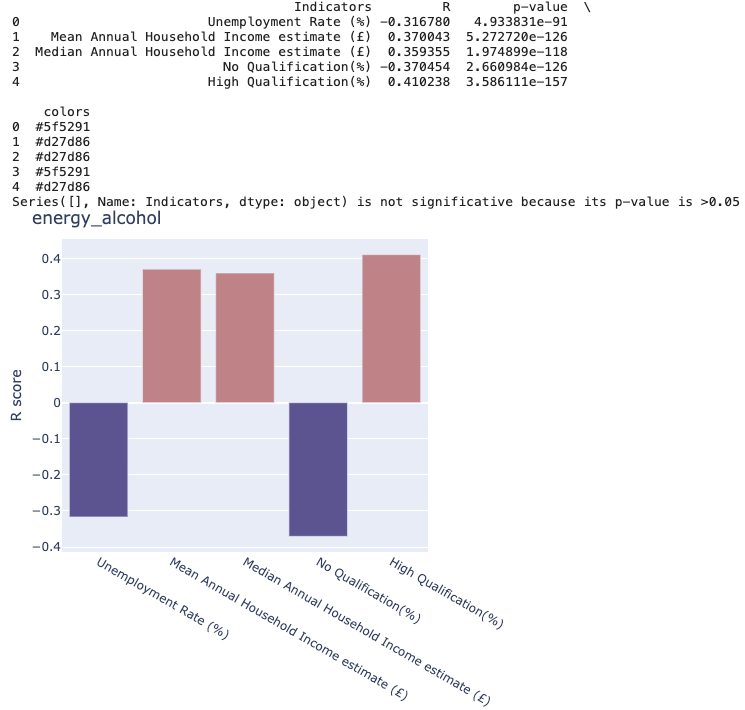

<Figure size 864x432 with 0 Axes>

In [7]:
id_indicators=['Unemployment Rate (%)','Mean Annual Household Income estimate (£)',\
               'Median Annual Household Income estimate (£)','No Qualification(%)','High Qualification(%)']
nutriments=['energy_sugar','energy_fat','energy_alcohol',"energy_saturate",'energy_carb',\
            'energy_tot','energy_protein','energy_fibre']
R=[]
P=[]

j = 'energy_alcohol'

for i in id_indicators:
    r= stats.spearmanr(df_representativ[j],df_representativ[i],nan_policy='omit')[0]
    p= stats.spearmanr(df_representativ[j],df_representativ[i],nan_policy='omit')[1]
    R.append(r)
    P.append(p)

#Create a data frame with the results
results = pd.DataFrame({ 'Indicators':id_indicators,'R': R,'p-value':P})

#showing indicators with non-significative p-value
non_significativ=results.loc[(results['p-value'] > 0.05)]
plt.figure(figsize=(12,6))

#plot for each nutrient correlation with indicators 
    #plot settings


results['colors'] = ['#5f5291' if x < 0 else '#d27d86' for x in R]
# Plot
if plotlyCompute:
    print(results)
    print(non_significativ.Indicators,'is not significative because its p-value is >0.05')
    fig = go.Figure()
    fig.add_trace(
        go.Bar(
               x=results['Indicators'],
               y=results['R'],
               marker_color=results['colors']))
    fig.update_layout(title_text=j, width=500,height=500,
                      margin=dict(
                                l=0,
                                r=0,
                                b=0,
                                t=30,
                                pad=0))
    fig.update_yaxes(title_text='R score')
    fig.show()
    #fig.write_html(j+'.html')
    R=[]
    P=[]
        
if not plotlyCompute:
    display(Image(filename='images/alcohol.png'))

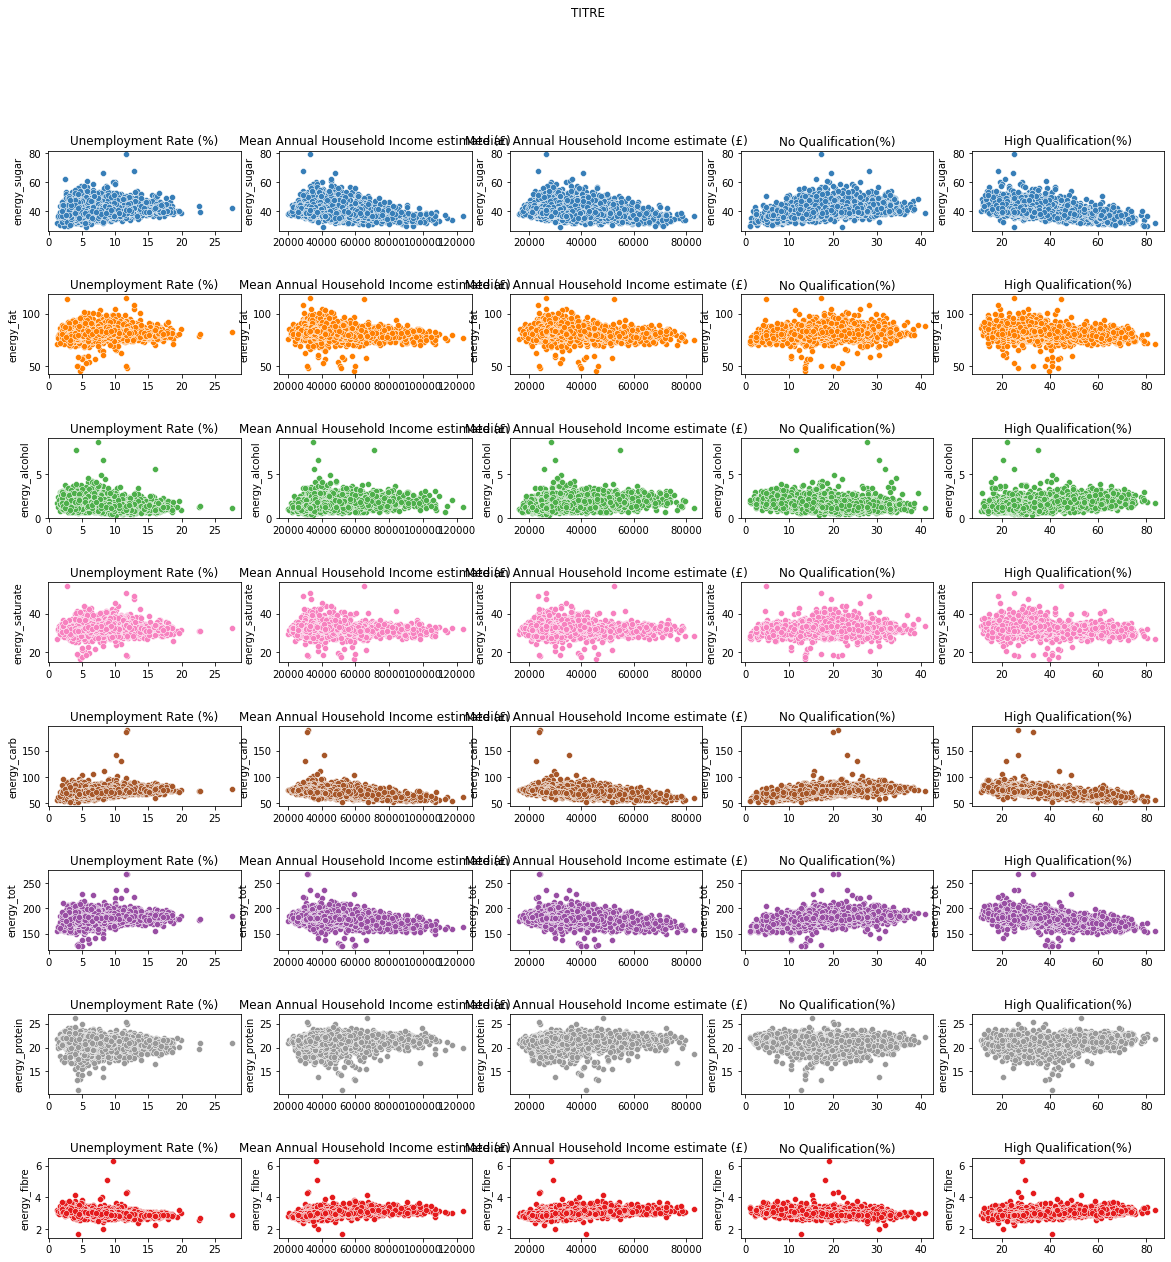

In [8]:
#creating plots to show correlations
fig, axs = plt.subplots(8, 5,figsize=(20,20))
plt.subplots_adjust(hspace = 0.8)

fig.suptitle('TITRE')
CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c']

for j in nutriments:
    for i in id_indicators:
        plot=sns.scatterplot(ax=axs[nutriments.index(j),id_indicators.index(i)],x=i,\
                             y=j,data=df_representativ,color=CB_color_cycle[nutriments.index(j)])
        plot.set(xlabel=None)
        axs[nutriments.index(j),id_indicators.index(i)].set_title(i)

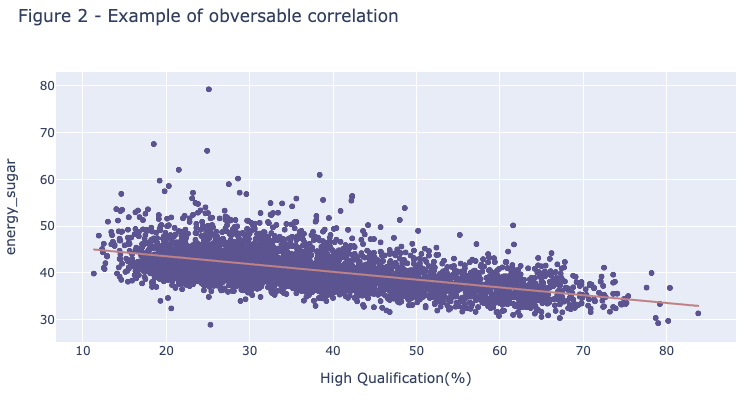

In [9]:
#verifying that representativeness and indicators are not correlated: for exemple rich people (high income)
#could buy more at Tesco than other people
R_representativeness=[]
P_representativeness=[]
for i in id_indicators:
    [r,p] = stats.spearmanr(df_representativ['representativeness_norm'],df_representativ[i],nan_policy='omit')
    R_representativeness.append(r)
    P_representativeness.append(p)
    
#Create a data frame with the results
results = pd.DataFrame({ 'Indicators':id_indicators,'R': R_representativeness,'p-value':P_representativeness})

#Exemple of observable correlation
if plotlyCompute:
    fig = px.scatter(df_representativ, x='High Qualification(%)',y='energy_sugar',\
                     title='Figure 2 - Example of obversable correlation',color_discrete_sequence=["#5f5291"],\
                     trendline='ols', trendline_color_override="#d27d86")
    fig.show()
    fig.write_html('scatter.html')
else:
    display(Image(filename='images/dots.png'))

# Healthy Diet Part

In [10]:
#We got map data from the following URL : https://data.london.gov.uk/dataset/statistical-gis-boundary-files-london

# First we need to import it and convert it to GeoJSON format
# we only do that once
convertion = False

if convertion:
    
    shapefile = gpd.read_file("./data/shapefile/LSOA_2011_London_gen_MHW.shp")
    #convert CRS for more optimal format
    shapefile = shapefile.to_crs(epsg=4326)
    #save the file
    shapefile.to_file('./data/lsoaMap.json', driver = 'GeoJSON')
    #load the newly generated GeoJSON
    with open('./data/lsoaMap.json') as geofile:
        lsoaJSON = json.load(geofile)
    #small formatting to get proper IDs
    for k in range(len(jdataNo['features'])):
        lsoaJSON['features'][k]['id'] = lsoaJSON['features'][k]['properties']['LSOA11CD']
    #save the modification
    with open('./data/lsoaMap.json', 'w') as geofile:
        json.dump(lsoaJSON, geofile)

## The Data 

### Import data

In [11]:
#importing data
data_folder = './data/'

with open('./data/lsoaMap.json') as geofile:
    lsoaJSON = json.load(geofile)

Tesco_lsoa = pd.read_csv(data_folder + 'year_lsoa_grocery.csv')
lsoa_data_1 = pd.read_excel(data_folder + 'lsoa-data.xls','iadatasheet1',header=[0, 1, 2])
lsoa_data_2 = pd.read_excel(data_folder + 'lsoa-data.xls','iadatasheet2',header=[0, 1, 2])
    
#create a DataFrame with indicators
indicators=pd.DataFrame({
    'area_id':lsoa_data_2[('Unnamed: 0_level_0', 'Unnamed: 0_level_1', 'Codes')],
    'Unemployment Rate (%)':lsoa_data_2[('Economic Activity', 'Unemployment Rate', 2011)],
    'Mean Annual Household Income estimate (£)':lsoa_data_2[('Household Income, 2011/12',\
        'Mean Annual Household Income estimate (£)', 'Unnamed: 72_level_2')],
    'Median Annual Household Income estimate (£)':lsoa_data_2[('Household Income, 2011/12',\
        'Median Annual Household Income estimate (£)', 'Unnamed: 73_level_2')],
    'No Qualification(%)':lsoa_data_2[('Qualifications', '% No qualifications', 2011)],
    'High Qualification(%)':lsoa_data_2[('Qualifications',\
        '% Highest level of qualification: Level 4 qualifications and above', 2011)]
})

#Merging data
df = pd.merge(indicators,Tesco_lsoa,on='area_id')

### Filter low representativeness areas 

In [12]:
#Keep datas with representativness >0.1 

df_rp = df.loc[(df['representativeness_norm'] > 0.1)]
unrp_areas=df.shape[0]-df_rp.shape[0]
print(unrp_areas,'areas are not representative enough and non used in our study')

959 areas are not representative enough and non used in our study


## Are Londonners respecting the WHO recommendations ? 

We will study 6 different types of nutrients intake
- fat energy
- sugar_energy
- saturate_energy
- carb_energy 
- sugar_energy
- saturate_energy

In [13]:
# Here are the OMS recomandations 

# WoH recomandations
OMS_recomandations = {  
                        'fat'      : ['less_than', 0.3],
                        'sugar'    : ['less_than', 0.05],
                        'saturate' : ['less_than', 0.05],
                        'carb'     : ['around', 0.4],
                        'fibre'    : ['more_than', 0.03],
                        'protein'  : ['around', 0.12]
                     }

# Computing the % of nutrient energy within a typical product

nutrients = ['fat', 'sugar', 'saturate', 'carb', 'fibre', 'protein']

for nutrient in nutrients : 
    add_perc_column(nutrient, df_rp)

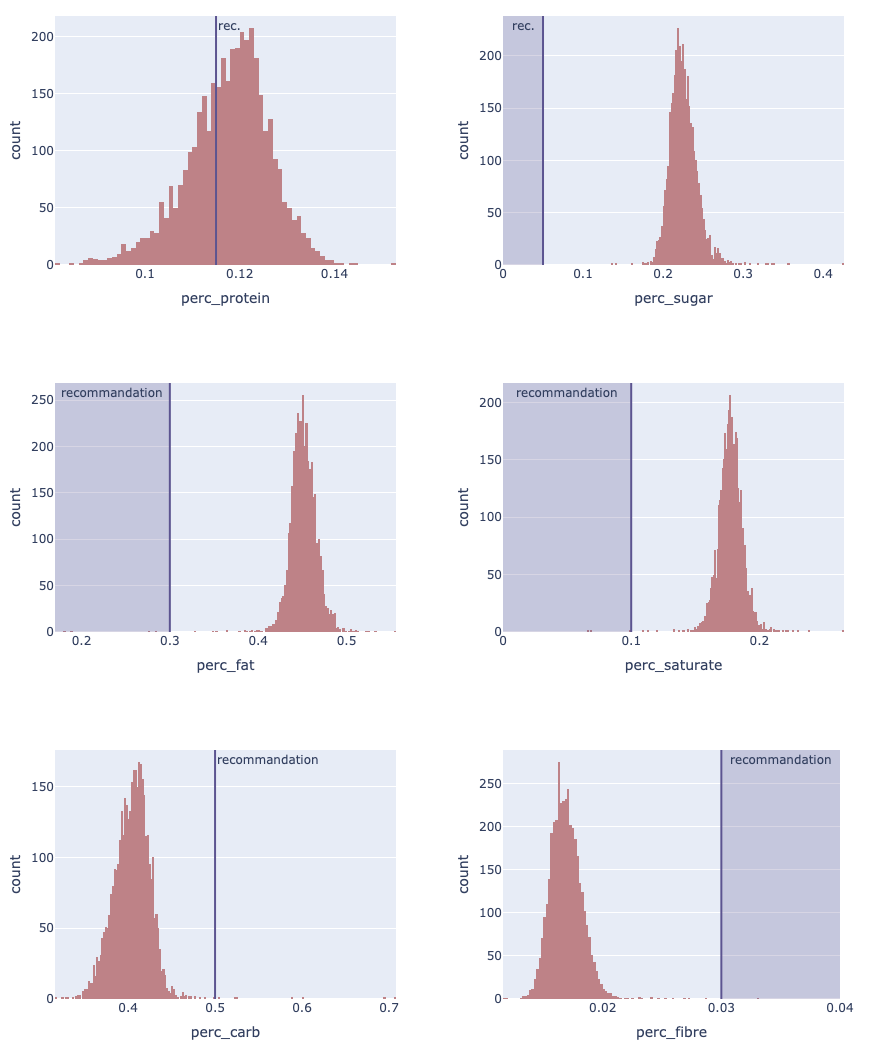

In [14]:
if plotlyCompute:
    
    #we don't iterate in a loop because plotly express doesn't support subplots as of time of writing
    #second reason for no for loop: all the plots have some special objects

    #perc_protein
    df = px.data.tips()
    fig = px.histogram(df_rp, x=df_rp.perc_protein,width=400, height=300, color_discrete_sequence=["#d27d86"])
    fig.add_vline(x=0.115,line_color='#5f5291',annotation_text='rec.')
    fig.update_layout(
        margin=dict(l=0, r=10, t=10, b=0),
    )
    fig.show()
    #fig.write_html('perc_protein.html')

    #perc_sugar
    df = px.data.tips()
    fig = px.histogram(df_rp, x=df_rp.perc_sugar,width=400, height=300, color_discrete_sequence=["#d27d86"])
    fig.add_vline(x=0.05,line_color='#5f5291')
    fig.add_vrect(x0=0.05,x1=0,fillcolor='#5f5291',opacity=0.25,line_width=0,annotation_text='rec.',\
                  annotation_position='top')
    fig.update_layout(
        margin=dict(l=0, r=10, t=10, b=0),
    )
    fig.show()
    #fig.write_html('perc_sugar.html')

    #perc_fat
    df = px.data.tips()
    fig = px.histogram(df_rp, x=df_rp.perc_fat,width=400, height=300, color_discrete_sequence=["#d27d86"])
    fig.add_vline(x=0.3,line_color='#5f5291')
    fig.add_vrect(x0=0.3,x1=0.17,fillcolor='#5f5291',opacity=0.25,line_width=0,\
                  annotation_text='recommandation',annotation_position='top')
    fig.update_layout(
        margin=dict(l=0, r=10, t=10, b=0),
    )
    fig.show()
    #fig.write_html('perc_fat.html')

    #perc_saturate
    df = px.data.tips()
    fig = px.histogram(df_rp, x=df_rp.perc_saturate,width=400, height=300, color_discrete_sequence=["#d27d86"])
    fig.add_vline(x=0.1,line_color='#5f5291')
    fig.add_vrect(x0=0.1,x1=0,fillcolor='#5f5291',opacity=0.25,line_width=0,annotation_text='recommandation',\
                  annotation_position='top')
    fig.update_layout(
        margin=dict(l=0, r=10, t=10, b=0),
    )
    fig.show()
    #fig.write_html('perc_saturate.html')

    #perc_carb
    df = px.data.tips()
    fig = px.histogram(df_rp, x=df_rp.perc_carb,width=400, height=300, color_discrete_sequence=["#d27d86"])
    fig.add_vline(x=0.5,line_color='#5f5291',annotation_text='recommandation')
    fig.update_layout(
        margin=dict(l=0, r=10, t=10, b=0),
    )
    fig.show()
    #fig.write_html('perc_carb.html')

    #perc_fibre
    df = px.data.tips()
    fig = px.histogram(df_rp, x=df_rp.perc_fibre,width=400, height=300, color_discrete_sequence=["#d27d86"])
    fig.add_vline(x=0.03,line_color='#5f5291')
    fig.add_vrect(x0=0.03,x1=0.04,fillcolor='#5f5291',opacity=0.25,line_width=0,\
                  annotation_text='recommandation',annotation_position='top')
    fig.update_layout(
        margin=dict(l=0, r=10, t=10, b=0),
    )
    fig.show()
    #fig.write_html('perc_fibre.html')
else:
    display(Image(filename='images/6.png'))

## Compute a WHO related score for each area 

### Scoring functions

In [62]:
# Create % Columns to be able to compare with OMS
def add_perc_column(nutrient, df) : 
    
    # Name of energy column 
    energy = 'energy_' + nutrient  
    
    # Name of new column 
    name = 'perc_' + nutrient
    
    # Create new column 
    df.loc[:,name] = df.loc[:, energy] / df.energy_tot
        
# Get the outliers 
def get_outliers(nutrient, std_treshold, df) : 
    
    '''
    Imput : tresh ( treshold on standard dev  ) 
    Nutrient - string 
    OMS_recom - dict 
    df - dataframe 
    '''     
    
    # Name of column 
    energy = 'energy_' + nutrient
    
    # Mean and std across areas 
    mean_nutrient = df[energy].describe()[1]
    std_nutrient = df[energy].describe()[2]  
    
    outliers_left = df[energy].apply(lambda x: x < (mean_nutrient - std_treshold * std_nutrient))
    outliers_right = df[energy].apply(lambda x: x > (mean_nutrient + std_treshold * std_nutrient))
    
    return outliers_left, outliers_right


# Outliers needs to have a score as well 

def assign_outliers_score(nutrient, OMS_recom, df) : 
    
    '''
    recom_type 
    'less' : when the recomandation is to eat less of that nutrient 
    'more' : when the recomandation is to eat more of that nutrient  
    '''
    # Define outlier treshold
    std_treshold = 2
    
    # Creating array of scores 
    name = nutrient + '_omsScore'
    energy = 'energy_' + nutrient
    perc_col = 'perc_' + nutrient
    df.loc[:, name] = -1 
    
    # Get outliers
    outliers_left, outliers_right = get_outliers(nutrient, std_treshold, df)
    
    # Transform nutrient energy into %
    perc_left  = df.loc[outliers_left,  energy] / df.loc[outliers_left,  'energy_tot']
    perc_right = df.loc[outliers_right, energy] / df.loc[outliers_right, 'energy_tot']
    
    if OMS_recom[0] == 'less_than' :
        df.loc[outliers_left,  name] = perc_left.apply(lambda x : 0 if \
                                                       x < OMS_recom[1] else -1)
        df.loc[outliers_right, name] = 1
        
    elif OMS_recom[0] == 'more_than' :
        df.loc[outliers_right, name] = perc_right.apply(lambda x : 0 if \
                                                        x > OMS_recom[1] else -1)
        df.loc[outliers_left,  name] = 1 
        
    elif OMS_recom[0] == 'around' :
        
        # Min and Max amongst non-outliers areas  
        outliers = outliers_left | outliers_right
        mini = df.loc[~outliers, perc_col].describe()[3]
        maxi = df.loc[~outliers, perc_col].describe()[7]
        
        # Define what is the worst case 
        worst_case = max(abs(OMS_recom[1]-mini), abs(OMS_recom[1]-maxi))   
        df.loc[outliers, name] = perc_right.apply(lambda x : 1 if \
                                                  abs(x-OMS_recom[1]) > worst_case else -1)
        
        
        
def set_scores(nutrient, OMS_val, df) : 
    
    '''
    Imput : x ( pourcentage ) 
    Nutrient - string 
    OMS_recom - dict 
    df - dataframe 
    '''
    
    # Outliers treshhold 
    tresh = 2
    
    # Names of columns 
    energy = 'energy_' + nutrient
    oms_score_col = nutrient + '_omsScore'
    minmax_col = nutrient + '_minmax'
    perc_col = 'perc_' + nutrient
    
    # Get outliers 
    outliers_left, outliers_right = get_outliers(nutrient, tresh, df)
    outliers = outliers_left | outliers_right

    # Get min max after removing outliers 
    mean = df.loc[~outliers, perc_col].describe()[1]
    mini = df.loc[~outliers, perc_col].describe()[3]
    maxi = df.loc[~outliers, perc_col].describe()[7]    
    
    # Surpasses the recommendations 
    if(mini>OMS_val) : 
        df.loc[~outliers, oms_score_col] = df.loc[~outliers, perc_col].apply(\
                                             lambda x : (x-OMS_val)/(maxi-OMS_val))
        df.loc[outliers, oms_score_col]  = df.loc[outliers,  perc_col].apply(\
                                             lambda x : (x-OMS_val)/(maxi-OMS_val) \
                                             if (x>OMS_val and x<mini) else x)
    # Under the recommendations 
    elif(maxi<OMS_val) : 
        df.loc[~outliers, oms_score_col] = df.loc[~outliers, perc_col].apply(\
                                             lambda x : (OMS_val-x)/(OMS_val-mini))
        df.loc[outliers,  oms_score_col] = df.loc[outliers,  perc_col].apply(\
                                             lambda x : (OMS_val-x)/(OMS_val-mini) \
                                             if (x<OMS_val and x>maxi) else x)
    # Recomendations in between
    elif(maxi>OMS_val and mini<OMS_val) :
        worst_case = max(abs(OMS_val-mini), abs(OMS_val-maxi)) 
        
        df.loc[~outliers, oms_score_col] = df.loc[~outliers, perc_col].apply(\
                                             lambda x : abs(OMS_val-x)/worst_case)      
        df.loc[outliers,  oms_score_col] = df.loc[outliers,  perc_col].apply(\
                                             lambda x : abs(OMS_val-x)/worst_case \
                                             if abs(x-OMS_val) < worst_case else x) 
        

### Compute the scores 

In [15]:
names = ['protein', 'sugar', 'fat', 'saturate', 'carb', 'fibre']

for name in names:
    assign_outliers_score(name, OMS_recomandations[name], df_rp)
    set_scores(name,  OMS_recomandations[name][1], df_rp)
    df_rp[name+'_omsScore']=1-df_rp[name+'_omsScore']

#### Plot Map for a single nutrient

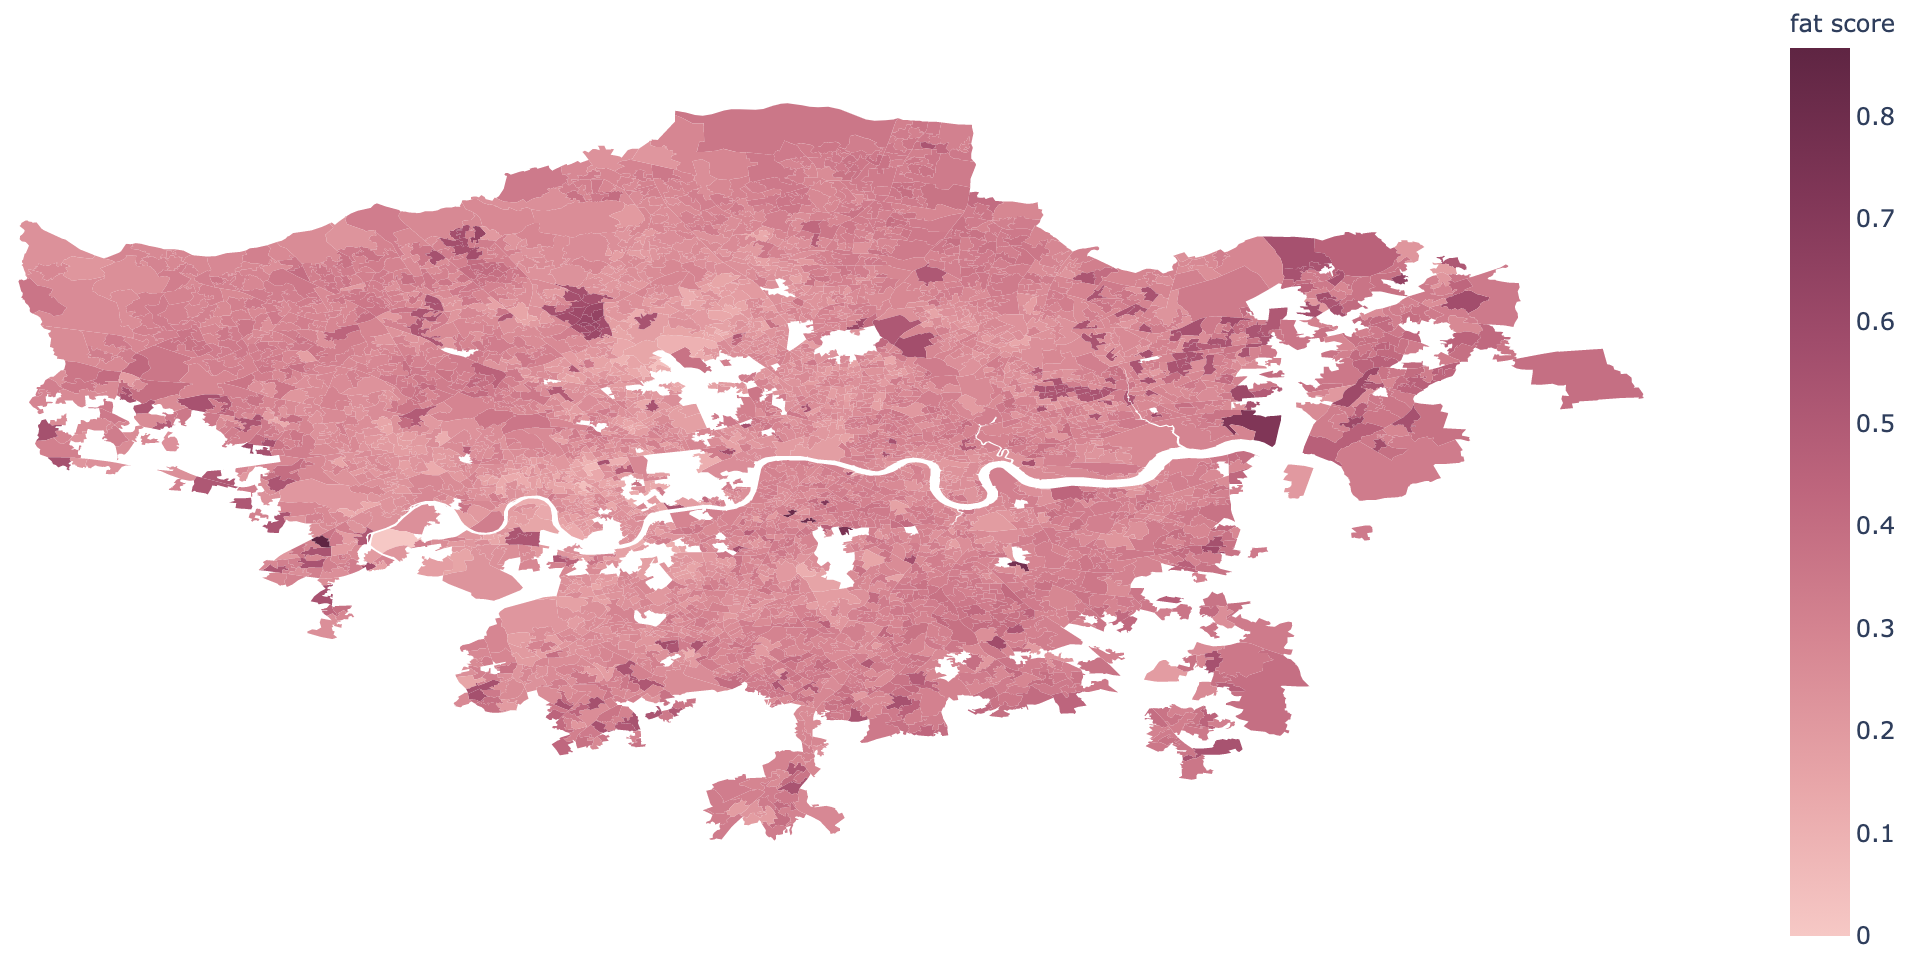

In [16]:
# Which nutrient
analyze = 'fat'

if plotlyCompute:
    fig = px.choropleth(df_rp, geojson=lsoaJSON, locations=df_rp.area_id, \
                        color=df_rp[analyze+'_omsScore'], color_continuous_scale="Burg")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_traces(marker_line_width=0)
    fig.update_geos(fitbounds="locations", visible=False)
    fig.layout.coloraxis.colorbar.title = 'fat score'
    fig.show()
    #fig.write_html('fatMap.html')
else:
    display(Image(filename='images/fatMap.png'))

### Total Average Score 

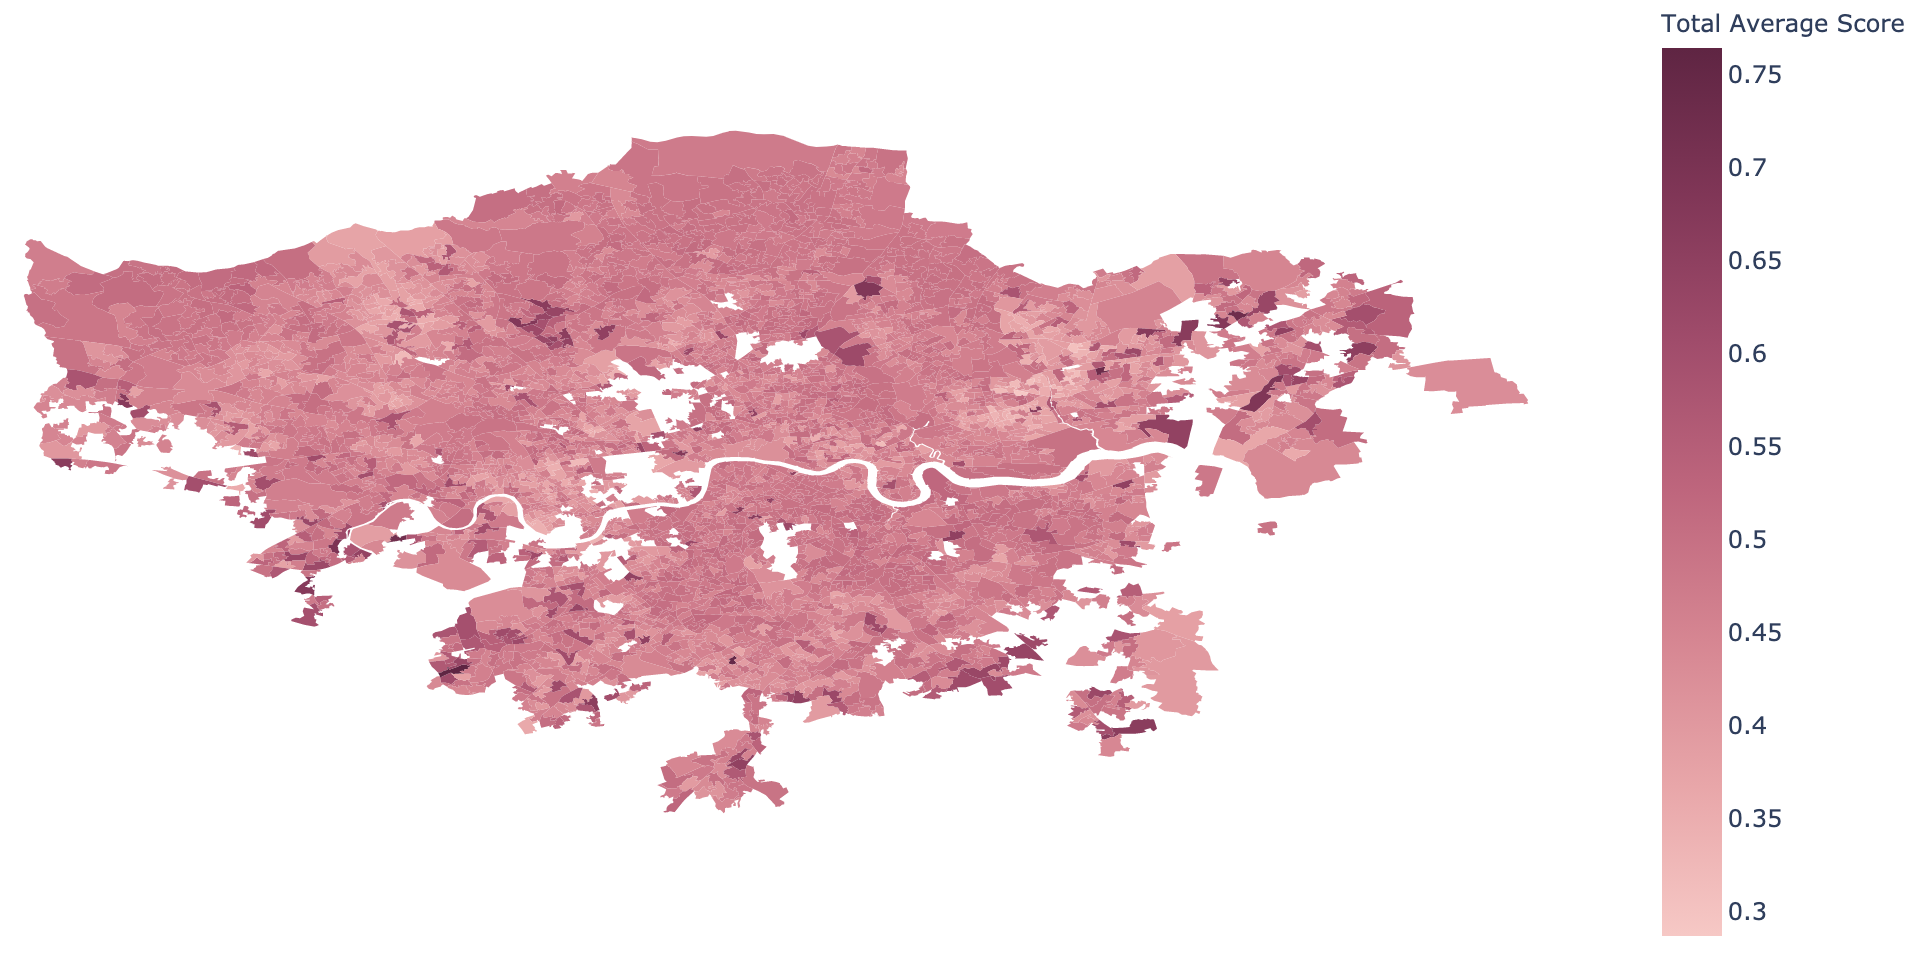

In [17]:
average_score = 1/6*(df_rp.protein_omsScore+df_rp.sugar_omsScore+df_rp.fat_omsScore+\
                     df_rp.saturate_omsScore+df_rp.carb_omsScore+df_rp.fibre_omsScore)

if plotlyCompute:
    fig = px.choropleth(df_rp, geojson=lsoaJSON, locations=df_rp.area_id, \
                        color=average_score, color_continuous_scale="Burg")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    fig.update_traces(marker_line_width=0)
    fig.update_geos(fitbounds="locations", visible=False)
    fig.layout.coloraxis.colorbar.title = 'Total Average Score'
    fig.show()
    #fig.write_html('totalMap.html')
else:
    display(Image(filename='images/totalMap.png'))

### Is the average WHO Score correlated with the Income ?

In [18]:
[r,p]= stats.spearmanr(df_rp['Mean Annual Household Income estimate (£)'],average_score,nan_policy='omit')
print(r,p)

0.04515365096721228 0.0049394524137857535


#### Nope ..

### Let's look at the correlation between combinations of scores and socioeconomic factors

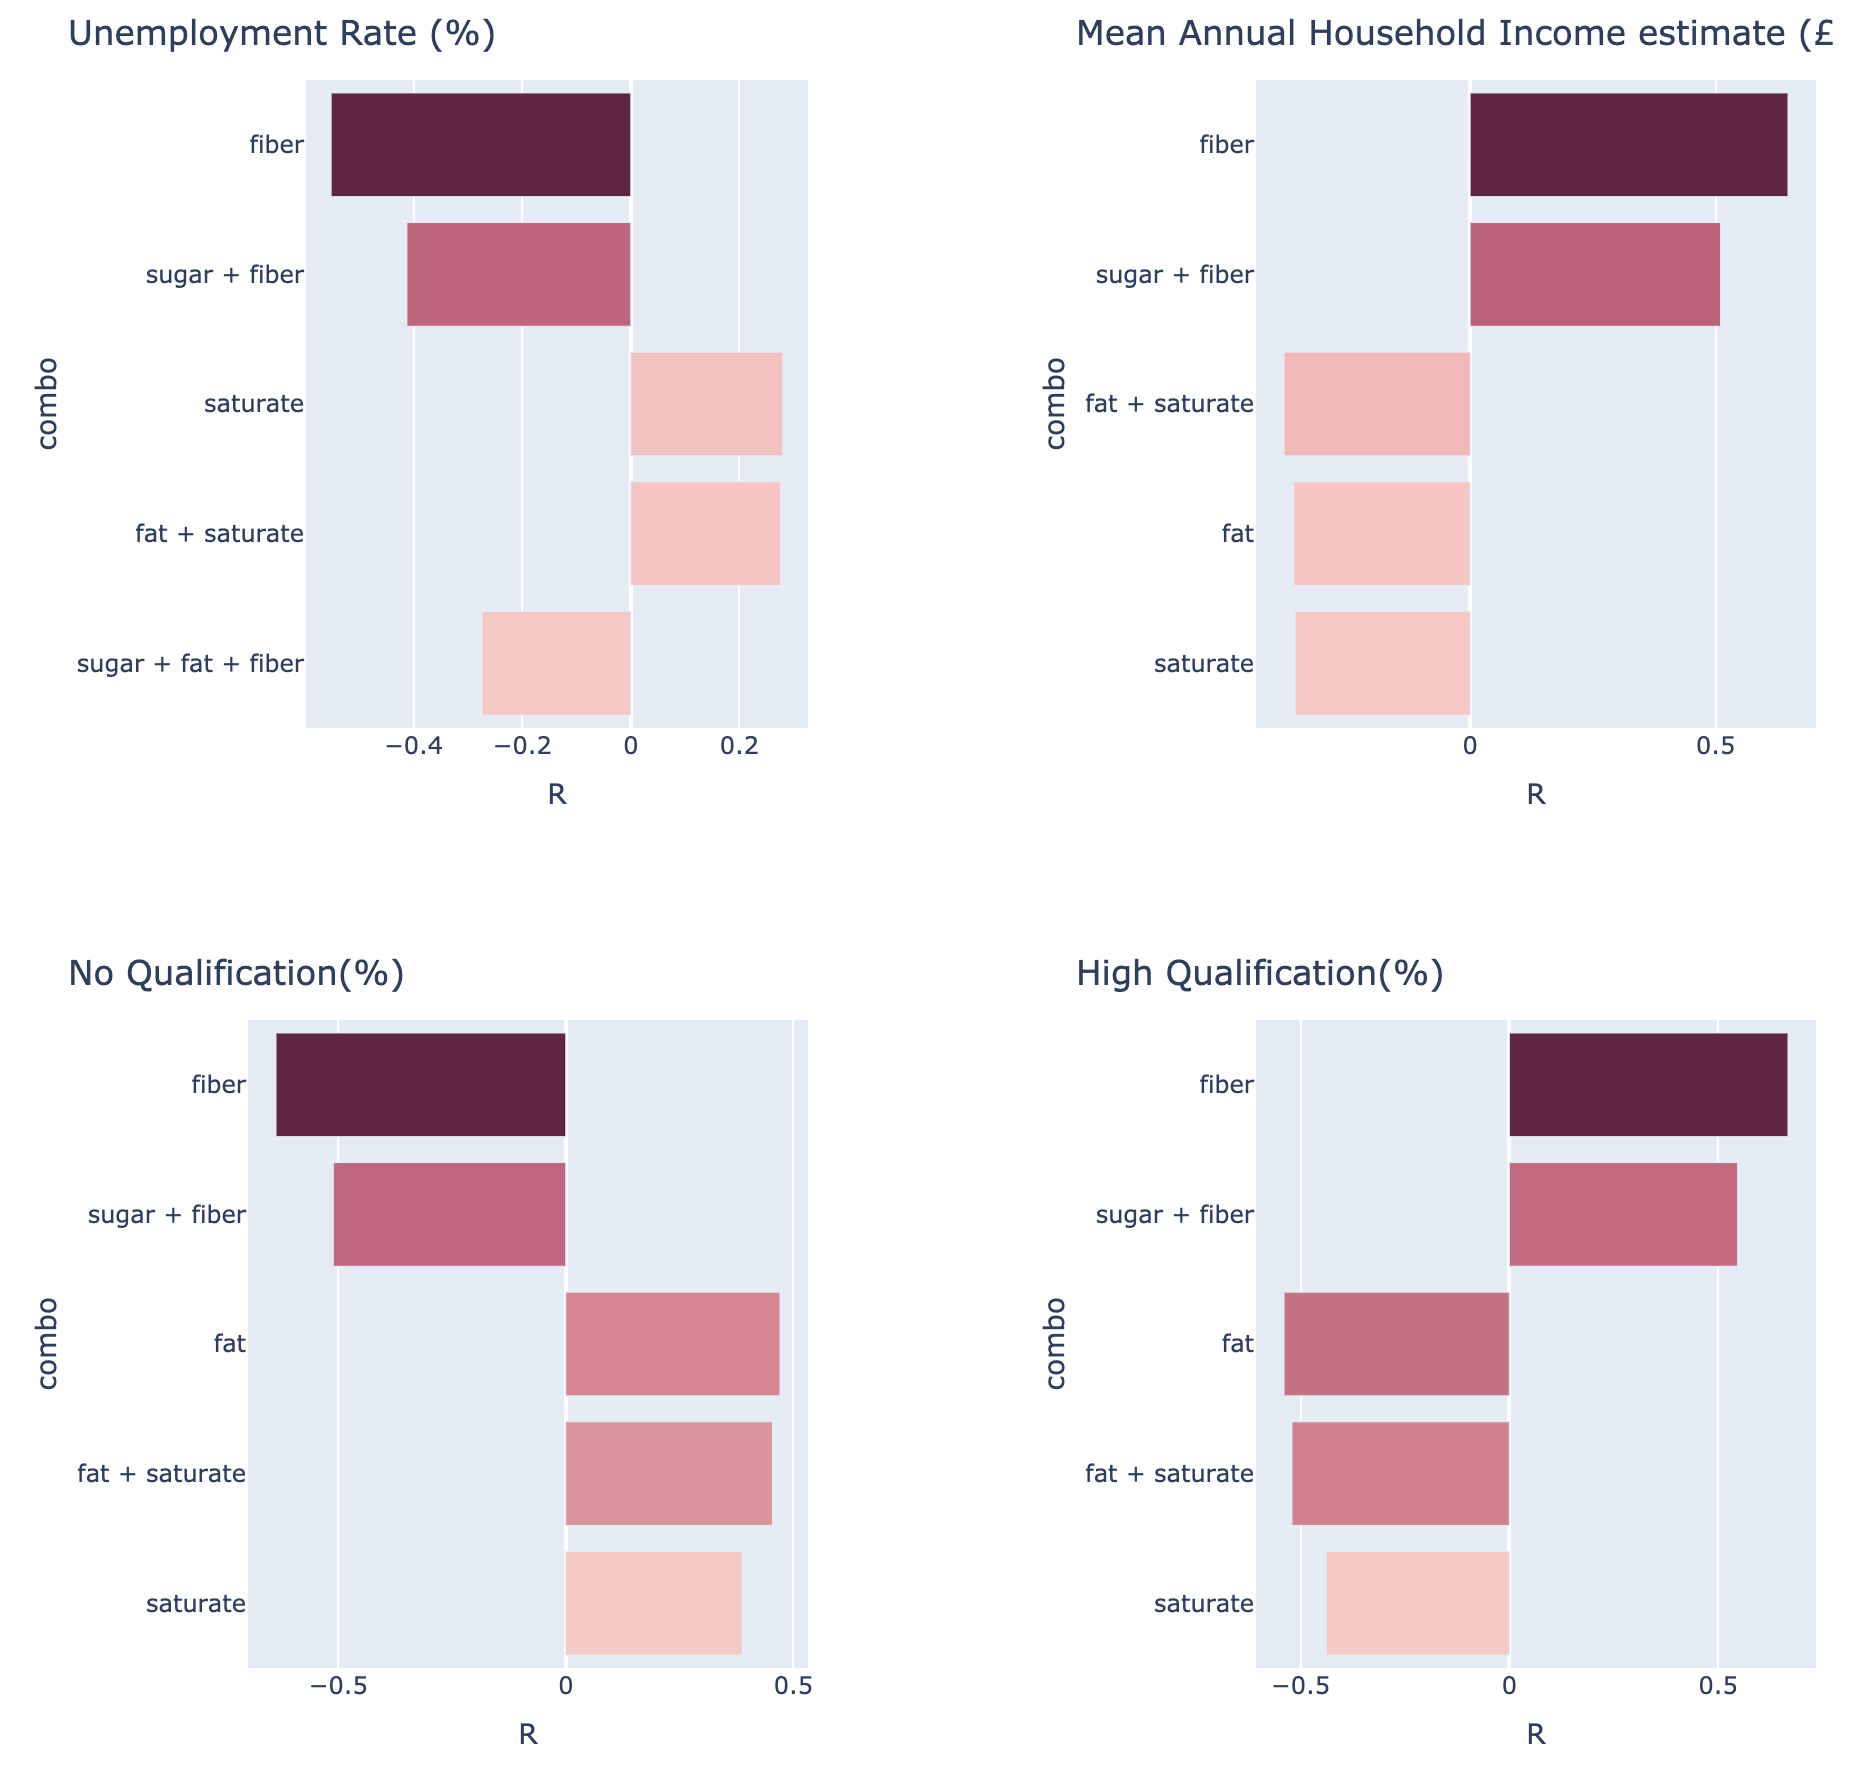

In [19]:
scores = [df_rp.protein_omsScore, df_rp.sugar_omsScore, df_rp.fat_omsScore, \
          df_rp.saturate_omsScore, df_rp.carb_omsScore, df_rp.fibre_omsScore]
names = ['protein', 'sugar', 'fat', 'saturate', 'carb', 'fiber']
factors = ['Unemployment Rate (%)','Mean Annual Household Income estimate (£)',\
           'No Qualification(%)','High Qualification(%)']
fac = ['Un','Mean','No','High']

#our indexes
stuff = [0,1,2,3,4,5]

#to create combinations
def powerset(iterable):
    s = list(iterable)  # allows duplicate elements
    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1))

#loop over every factor
for j,factor in enumerate(factors,1):
    combos = []
    scoreP = []
    scoreR = []
    
    #loop over every combination and compute score
    for i, combo in enumerate(powerset(stuff), 1):
        comboList = list(combo)
        average = 0
        index = 0
        for i in comboList:
            average = average + scores[i]
            comboList[index] = names[i]
            index = index + 1
        average = average/len(comboList)
        [r,p] = stats.spearmanr(df_rp[factor],average,nan_policy='omit')
        scoreP.append(p)
        scoreR.append(r)
        combos.append(' + '.join([str(elem) for elem in comboList]))

    df = pd.DataFrame({'combo': combos,
                       'R': scoreR,
                       'P': scoreP})
    df2 = df.reindex(df.R.abs().sort_values(ascending=False).index).head(5)
    df2 = df2.reindex(index=df2.index[::-1])
    df2 = df2.reset_index()
    df2 = df2.drop(['index'], axis=1)
    
    if plotlyCompute:
        fig = px.bar(df2, x="R", y ="combo", orientation='h',color =np.abs(df2['R']),\
                     color_continuous_scale="Burg",width=400, height=400)
        fig.update_layout(title_text=factor,
            margin=dict(l=0, r=10, t=35, b=0),
        )
        fig.update_layout(coloraxis_showscale=False)
        fig.show()
        fig.write_html('combo'+fac[j-1]+'.html')
        
if not plotlyCompute:
    display(Image(filename='images/4.png'))

### Last check

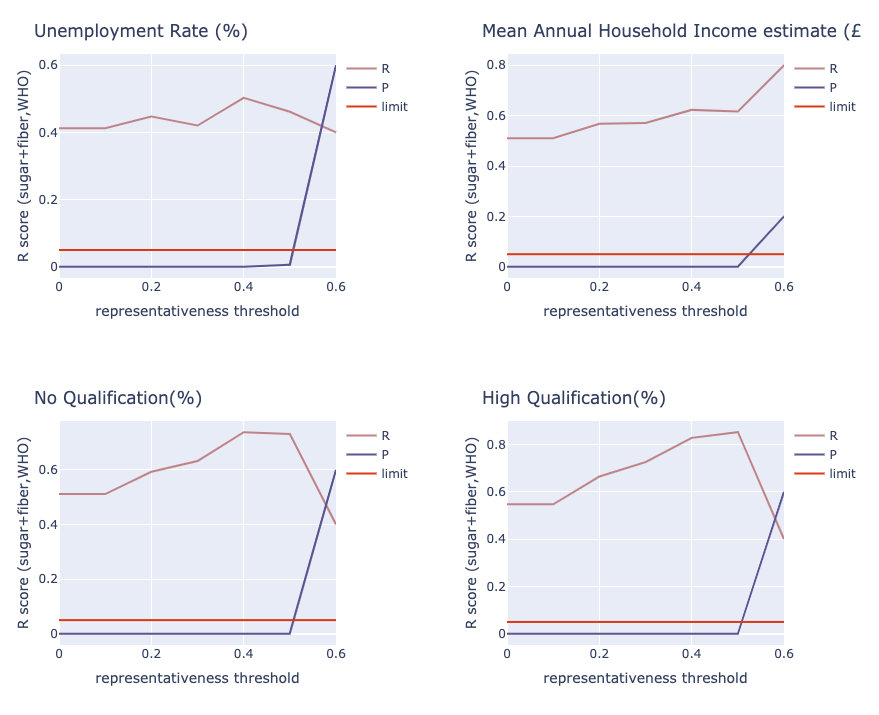

In [59]:
#we do a last check that our correlation is correct, let's choose the fiber+sugar score
average_score = 1/2 * (df_rp.sugar_omsScore + df_rp.fibre_omsScore)
average_score.describe()


id_indicators=['Unemployment Rate (%)','Mean Annual Household Income estimate (£)',\
               'No Qualification(%)','High Qualification(%)']
fac = ['Un','Mean','No','High']
x = np.arange(0, 1, 0.1)
R, P = [], []

R_Unemployment, P_Unemployment = [], []
R_HouseholdIncome, P_HouseholdIncome = [], []
R_NoQualification, P_NoQualification = [], []
R_HighQualification, P_HighQualification = [], []

resultsR = [R_Unemployment,R_HouseholdIncome,R_NoQualification,R_HighQualification]
resultsP = [P_Unemployment,P_HouseholdIncome,P_NoQualification,P_HighQualification]
line = []

#checking the score with a representativeness threshold
for rep in x :
    filtered = df_rp['representativeness_norm'] < rep
    new_df = df_rp.loc[~filtered]
    line.append(0.05)
    for i,name in enumerate(id_indicators):
    
        [r,p] = stats.spearmanr(new_df[name], average_score.loc[~filtered],nan_policy='omit')
        resultsR[i].append(abs(r))
        resultsP[i].append(p)

#plotting
for i,name in enumerate(id_indicators):
    df = pd.DataFrame({'R': resultsR[i],
                       'P': resultsP[i],
                        'limit': line})
    if plotlyCompute:
        fig = px.line(df, x=np.arange(0, 1, 0.1),y=['R','P','limit'],width=400, height=300,\
                      color_discrete_sequence=["#d27d86",'#5f5291','red'])
        fig.update_layout(title_text=name,
                        margin=dict(l=0, r=0, t=35, b=0),
                        legend_title_text=''
        )
        fig.update_xaxes(range=[0, 0.6])
        fig.update_xaxes(title="representativeness threshold")
        fig.update_yaxes(title="R score (sugar+fiber,WHO)")
        #fig.write_html('thres'+fac[i]+'.html')
        fig.show()

if not plotlyCompute:
    display(Image(filename='images/last.png'))